# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Membaca Dataset


In [2]:
dataset = pd.read_csv("sales.csv")
dataset

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
807,P816,0,1,0,0,1,2,2,6,0,...,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
808,P817,1,0,0,0,1,1,2,1,1,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75
809,P818,0,0,0,1,0,0,0,0,1,...,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.00


# Pemilihan Atribut X

In [3]:
dataset = dataset[["W1", "W2"]] #W1=x1, W2=x2
dataset.head(10)

,W1,W2
0,12,10
1,6,3
2,11,8
3,8,13
4,5,13
5,3,2
6,8,3
7,6,10
8,9,10
9,19,19


# Statistik Data

In [4]:
dataset.describe()

,W1,W2
count,811.000000,811.000000
mean,9.129470,9.389642
std,12.564766,13.045073
min,0.000000,0.000000
25%,0.000000,0.000000
50%,3.000000,3.000000
75%,12.000000,12.000000
max,53.000000,56.000000


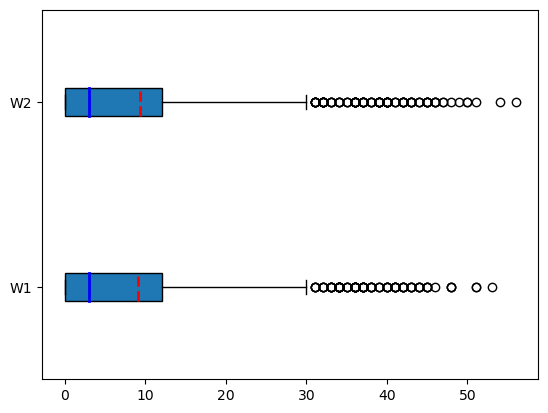

In [6]:
fig, ax = plt.subplots()
ax.boxplot(dataset,
          vert = False,
          showmeans = True,
          meanline = True,
          labels = ("W1", "W2"),
          patch_artist = True,
          medianprops = {"linewidth" : 2, "color" : "blue"},
          meanprops = {"linewidth" : 2, "color" : "red"})
plt.show()

# Membuang Outlier

<function matplotlib.pyplot.show(close=None, block=None)>

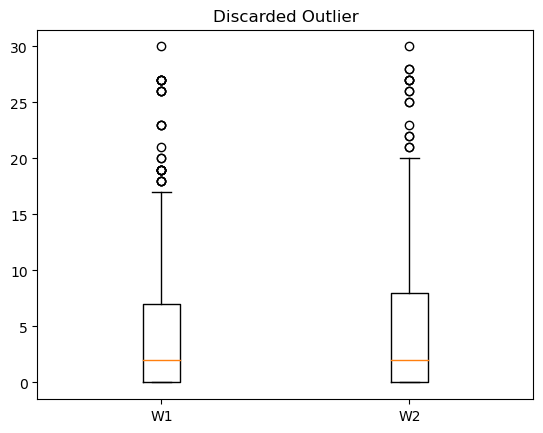

In [8]:
#Q1,Q3, IQR
kolom = ["W1", "W2"]

Q1 = dataset[kolom].quantile(0.25)
Q3 = dataset[kolom].quantile(0.75)
IQR = Q3-Q1
data = dataset[~((dataset[kolom]<(Q1 - 1.5 * IQR)) | 
                (dataset[kolom]>(Q3 + 1.5 * IQR))).any(axis = 1)]
plt.boxplot(data[kolom])
plt.xticks([1,2], kolom)
plt.title("Discarded Outlier")
plt.show

In [9]:
dataset.describe()

,W1,W2
count,811.000000,811.000000
mean,9.129470,9.389642
std,12.564766,13.045073
min,0.000000,0.000000
25%,0.000000,0.000000
50%,3.000000,3.000000
75%,12.000000,12.000000
max,53.000000,56.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   W1      811 non-null    int64
 1   W2      811 non-null    int64
dtypes: int64(2)
memory usage: 12.8 KB


# Membuat Nilai Dari X

In [11]:
x_array = np.array(dataset)

# Visualisasi Persebaran & Standarisasi Data

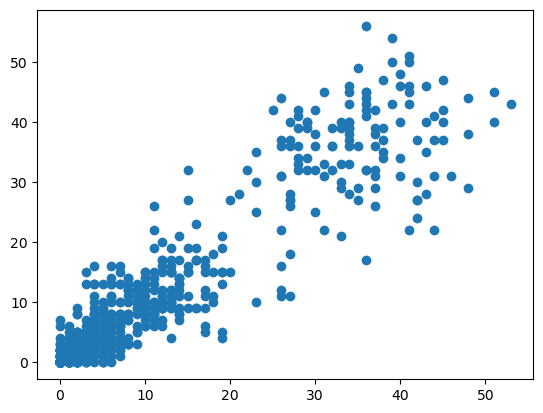

In [13]:
plt.scatter(dataset.W1, dataset.W2)

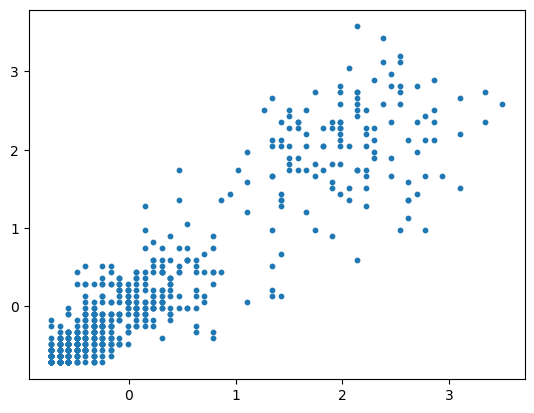

In [14]:
from sklearn.preprocessing import StandardScaler as stdsc
scaler = stdsc()
x_scaled = scaler.fit_transform(x_array)
plt.scatter(x_scaled[:,0], x_scaled[:,1],s=10)
plt.show()

# Cek Sum Square Error

In [15]:
from sklearn.cluster import KMeans
sse = []
index = range(1,10)
for i in index :
    kmeans = KMeans(n_clusters = i, random_state = 0, n_init=10) # (n_init= bisa 'auto' atau 10)
    kmeans.fit(x_scaled)
    sse_ = kmeans.inertia_
    sse.append(sse_)
    print (i,sse_)

1 1622.0
2 318.9570006112748
3 152.29001437030385
4 118.2996701337195
5 93.38069891388456
6 77.68143607887109
7 65.25872646508819
8 57.4777121643009
9 51.38116507391839


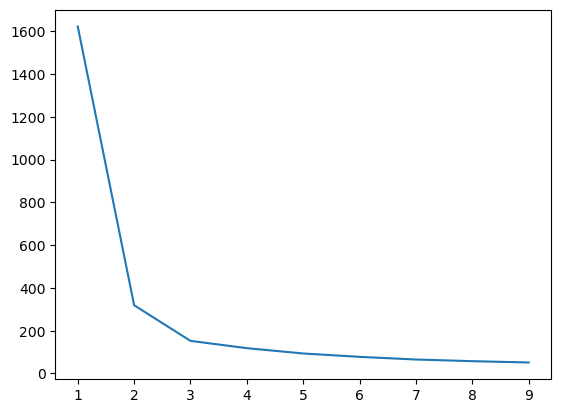

In [16]:
plt.plot(index,sse)
plt.show()

# Pembuatan Model dan Visualisasi Persebaran Data Setelah Cluster

In [17]:
kmeans = KMeans(n_clusters = 3, random_state=0, n_init=10) # (n_init= bisa 'auto' atau 10)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=0)

In [18]:
kmeans.cluster_centers_

array([[-0.60486764, -0.60316955],
       [ 2.071532  ,  2.07375144],
       [ 0.20505119,  0.19898927]])

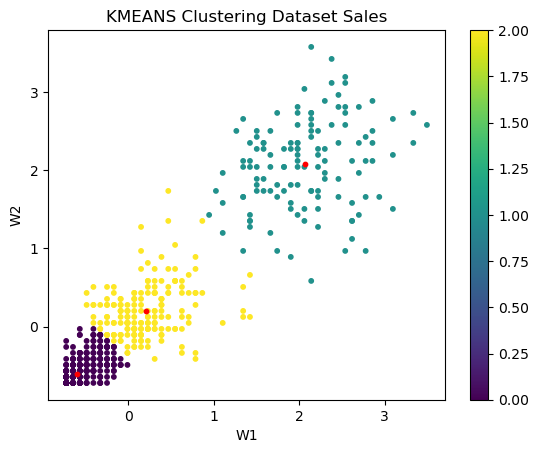

In [20]:
output = plt.scatter(x_scaled[:,0],x_scaled[:,1],s=10, c=kmeans.labels_) #Datanya

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], c="red", s=10)#Centroid
plt.title("KMEANS Clustering Dataset Sales")
plt.xlabel("W1")
plt.ylabel("W2")
plt.colorbar(output)
plt.show()

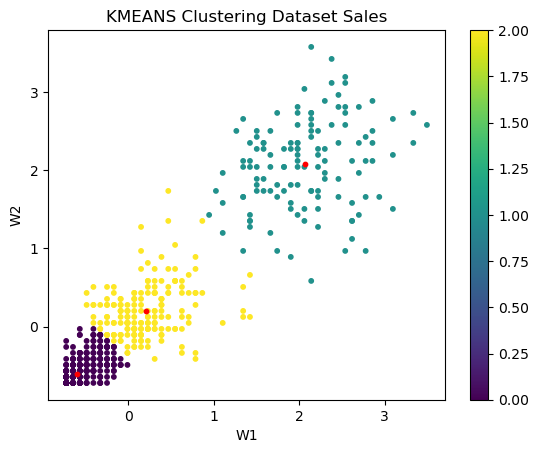

In [21]:
output = plt.scatter(x_scaled[:, 0], x_scaled[:, 1], s=10, c=kmeans.labels_)  # Datanya

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=10)  # Centroid
plt.title("KMEANS Clustering Dataset Sales")
plt.xlabel("W1")
plt.ylabel("W2")
plt.colorbar(output)
plt.show()


# Evaluasi Model

In [22]:
from sklearn.metrics import davies_bouldin_score

labels = kmeans.labels_
davies_bouldin_score(x_scaled, labels)

0.5135269448018508